Time of flight:        9.284 s
The range is:        219.76 m
Time of flight:        8.755 s
The range is:        105.39 m
Time of flight:        7.419 s
The range is:        238.76 m
Time of flight:        9.492 s
The range is:        180.63 m
Time of flight:        8.068 s
The range is:        232.28 m
Time of flight:        7.666 s
The range is:        164.36 m
Time of flight:        8.914 s
The range is:         91.67 m
Time of flight:        7.299 s
The range is:        179.31 m
Time of flight:        5.917 s
The range is:        216.92 m
Time of flight:        5.298 s
The range is:        154.13 m
Time of flight:        9.012 s
The range is:        115.21 m
Time of flight:        6.116 s
The range is:        186.90 m
Time of flight:       10.699 s
The range is:        145.13 m
Time of flight:       10.944 s
The range is:        200.98 m
Time of flight:        7.789 s
The range is:        228.48 m
Time of flight:        6.216 s
The range is:        221.07 m
Time of flight:        9

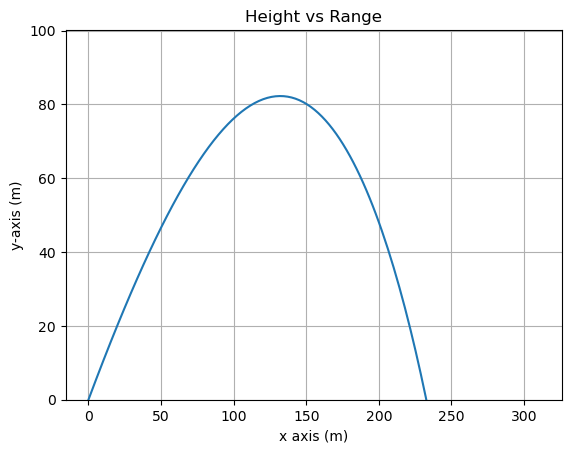

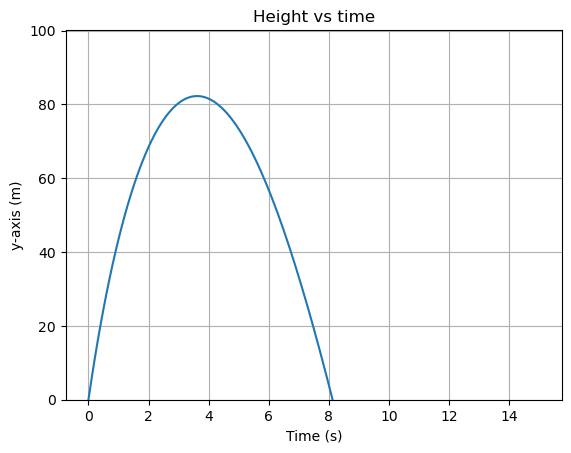

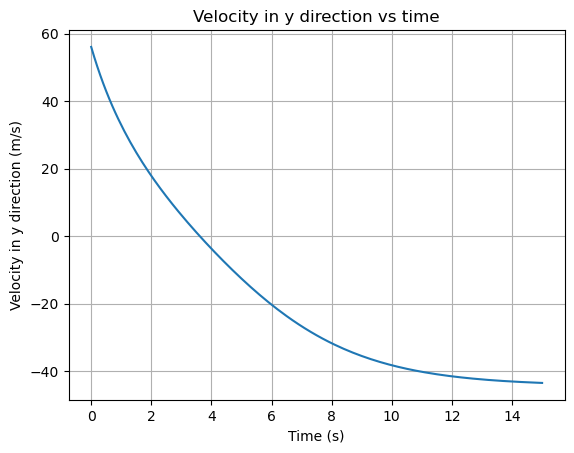

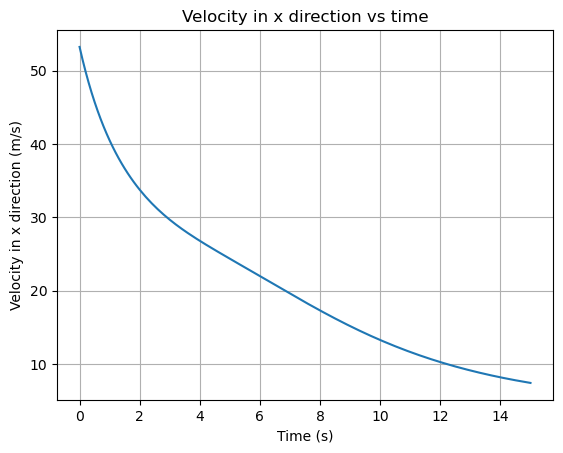

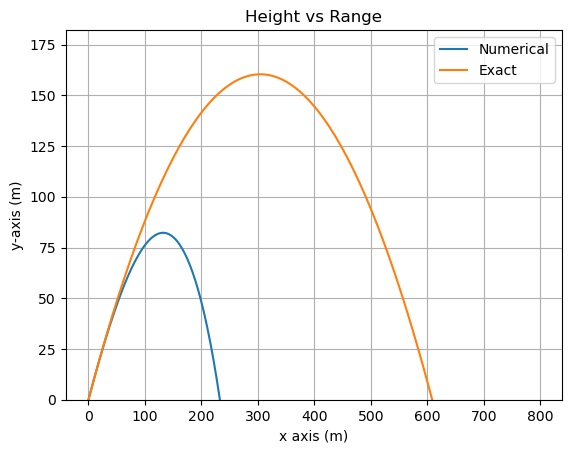

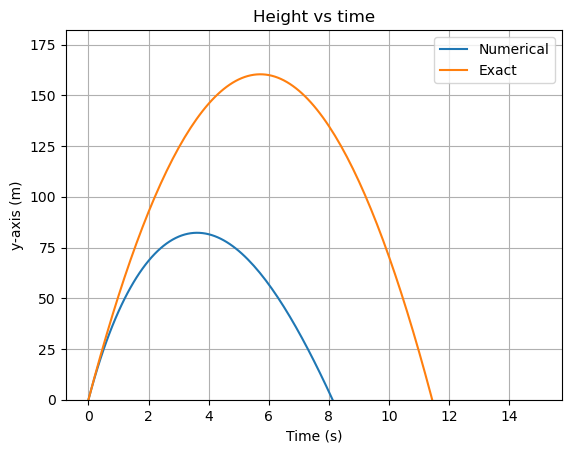

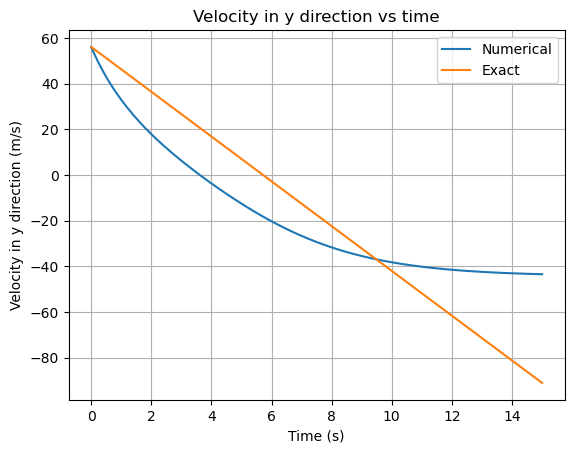

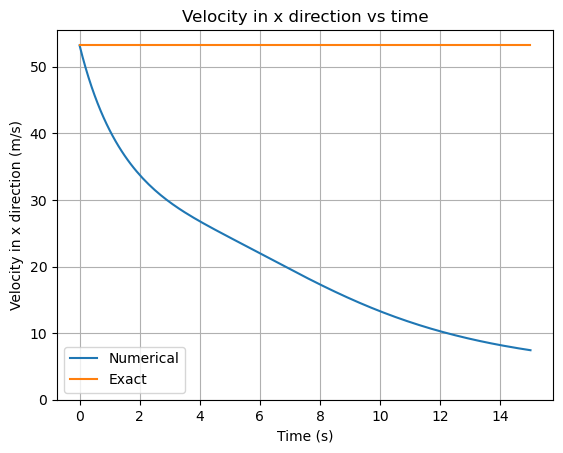

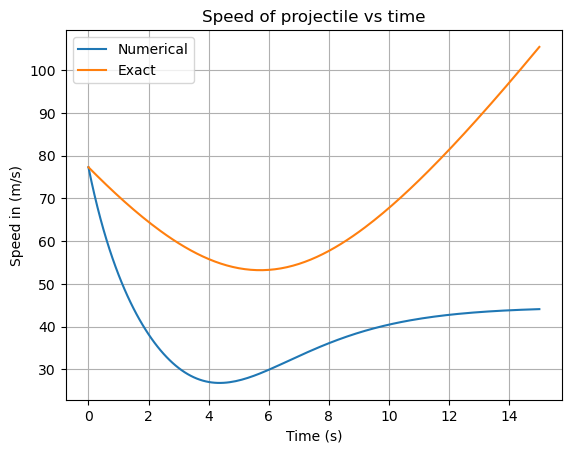

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

import random

#  The numerical framework for solving general ODE systems is adopted from the book    
#  Jaan Kiusalaas, 2013, Numerical Methods in Engineering. Used in the course MAF310
# Chapter 7, page 246 -267


def main():
    
    t=0.0      # Starting time for simulation (sec)
    tend = 15  # End of simulation time (sec). Must be increased if projectile has not reached the ground.
  
    
    utfil=open('ballistiskedata_med_vindRange_og_5kolonner.txt','w') 
    utfil.write('V0'+'\t'+'Ø'+'\t'+'w'+'\t'+'Time'+'\t'+'R'+'\n')
    
    for i in range(300):
    
        # Random draw of initial speed and direction    
        v0 = random.uniform(60,100) # mellom første parameter og andre parameter
        anggrader = random.uniform(30,70)
        
        ang = anggrader*math.pi/180  # Converted to radians 
    
        # Note that the wind is now specified here and sent into the functions.
        w = random.uniform(-5,5)
        # w=0
    
        y=np.array([0,v0*math.sin(ang),0,v0*math.cos(ang)])  # Initial conditions where the vx and vy are defined + +
        dt =0.1  # Timestep
        T,Y=integrate_rungk4(F,t,y,tend,dt,w)  # Integrates forward using Runge Kutta 4th order in time!
        #T,Y=integrate_euler(F,t,y,tend,dt)
    

        T1,Y1=exact_solution(v0,ang,y,t,tend,dt)
    
  #  printSoln(T,Y,1)
    
        flighttime,distance=findRange(T,Y)
        print(f'Time of flight: {flighttime:12.3f} s')
        print("The range is: ",format(distance,'12.2f'), 'm')
    
        
    
        utfil.write(str(format(v0,'.2f'))+'\t' + \
                str(format(anggrader,'.1f'))+'\t'+\
                str(format(w,'.1f'))+'\t'+\
                str(format(flighttime,'.2f'))+'\t'+\
                str(format(distance,'.2f'))+'\n')
    
    utfil.close()
    
    
    plt.plot(Y[:,2],Y[:,0])
    plt.grid(True)
    plt.xlabel('x axis (m)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs Range')
    plt.show()
    
    
    plt.plot(T,Y[:,0])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs time')
    plt.show()
    
    plt.plot(T,Y[:,1])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in y direction (m/s)')
    plt.title('Velocity in y direction vs time')
    plt.show() 
    
    plt.plot(T,Y[:,3])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in x direction (m/s)')
   # plt.ylim(ymin=0)
    plt.title('Velocity in x direction vs time')
    plt.show()  

    
    
    # Here comes comparison plot with the exact solution

    plt.plot(Y[:,2],Y[:,0],Y1[:,2],Y1[:,0])
    plt.grid(True)
    plt.xlabel('x axis (m)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs Range')
    plt.legend(['Numerical','Exact'])
    plt.show()
    
    
    plt.plot(T,Y[:,0],T1,Y1[:,0])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs time')
    plt.legend(['Numerical','Exact'])
    plt.show()
    
    
    plt.plot(T,Y[:,1],T1,Y1[:,1])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in y direction (m/s)')
    plt.title('Velocity in y direction vs time')
    plt.legend(['Numerical','Exact'])
    plt.show() 
    
    plt.plot(T,Y[:,3],T1,Y1[:,3])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in x direction (m/s)')
    plt.ylim(ymin=0)
    plt.title('Velocity in x direction vs time')
    plt.legend(['Numerical','Exact'])
    plt.show() 
    
        
    plt.plot(T,(Y[:,3]**2+Y[:,1]**2)**0.5,T1,(Y1[:,3]**2+Y1[:,1]**2)**0.5)
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Speed in (m/s)')
 #   plt.ylim(ymin=0)
    plt.title('Speed of projectile vs time')
    plt.legend(['Numerical','Exact'])
    plt.show()  
    
    
    
    
def exact_solution(v0,ang,y,t,tend,dt):
    T=[]
    Y=[]
    
    T.append(t)
    Y.append(y)


    g=9.81
    
    y=np.zeros(4)
    while(t<tend):
        dt=min(dt,tend-t)
        t=t+dt
        y = y+0; ## NB! Denne var viktig for å få det hele til å fungere.
        # Uten denne så virker det som bare den siste verdien blir lagret
        # i arrayen til slutt. Må ha med det spesielle i Python hvordan 
        # lister/arrays skal kopieres i Python
        
        y[0]=v0*math.sin(ang)*t-0.5*g*t**2
        y[1]=v0*math.sin(ang)-g*t
        y[2]=v0*math.cos(ang)*t
        y[3]=v0*math.cos(ang)
        T.append(t)
        Y.append(y)
      #  print(Y)
          
    return np.array(T),np.array(Y)

    
    
    
def integrate_euler(F,t,y,tend,dt):
    T=[]
    Y=[]
    T.append(t)
    Y.append(y)
    
    while(t<tend):
        dt=min(dt,tend-t)
        y=y+dt*F(t,y)
        t=t+dt
        T.append(t)
        Y.append(y)
    return np.array(T),np.array(Y)


def integrate_rungk4(F,t,y,tend,dt,w):
    
    # a general function that applies 4th order RungeKutta
    
    T=[]
    Y=[]
    T.append(t)
    Y.append(y)
    
    while t<tend:
        dt=min(dt,tend-t)
        y=y + run_kut4(F,t,y,dt,w)
        t=t+dt
        T.append(t)
        Y.append(y)
    return np.array(T),np.array(Y)


def run_kut4(F,x,y,h,w):
  #  4th order Runge Kutta Method 
  # Do not have to change this
    K0=h*F(x,y,w)
    K1=h*F(x+0.5*h,y+0.5*K0,w)
    K2=h*F(x+0.5*h,y+0.5*K1,w)
    K3=h*F(x+h,y+K2,w)
    
    return (K0+2*K1+2*K2+K3)/6.0


def F(t,y,w):
    # This is the function that must be changed when switching between different ordinary differential equations 
    
    Cd=0.01
    m=2
    g=9.81
  
    
    F=np.zeros(4)
    
     #  Air drag proportional to v^2 + wind
    F[0]=y[1]
    F[1]=-Cd/m*y[1]*((y[1]**2+(y[3]-w)**2)**0.5)-g
    F[2]=y[3]
    F[3]=-Cd/m*(y[3]-w)*((y[1]**2+(y[3]-w)**2)**0.5)
    
    return F


def findRange(T,Y):
     
    last = len(Y[:,0])
    
    if(Y[last-1,0])>=0:
        print('Projectile has not reached ground, Increase end simulation time')  
        return 0,0 
    
    else:
        indeks = 0
    
        while Y[indeks,0]>=0:
            save = Y[indeks,0] 
            indeks = indeks +1
    
        slope = (Y[indeks,0]-Y[indeks-1,0])/(T[indeks]-T[indeks-1])
        Timpact = T[indeks-1]-Y[indeks-1,0]/slope    
    
        xint=(Timpact-T[indeks-1])/(T[indeks]-T[indeks-1])
    #print(xint)
        Range = (1-xint)*Y[indeks-1,2]+xint*Y[indeks,2]
    
        return Timpact,Range 
    



def printSoln(X,Y,freq):
    m=len(Y)
    
    try: n=len(Y[0])
    except Typeerror: n=1
    
    if freq==0:
        freq=m
    printHead(n)
    
    for i in range(0,m,freq):
        printLine(X[i],Y[i],n)

def printHead(n):
    print("\n    x  ",end=" ")
    for i in range(n):
        print("     y[",i,"]  ",end=" ")
    
    print()
    
def printLine(x,y,n):
    print(format(x,'13.4e'),end=" ")
    for i in range(n):
        print(format(y[i],'13.4e'),end=" ")
    print()    
    
main()    
    